In [6]:
from sklearn.linear_model import  LogisticRegression 
from sklearn.model_selection import train_test_split, RepeatedKFold, RepeatedStratifiedKFold, StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, GaussianNB
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification


import time
import numpy as np
#!pip install imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import numpy as np
from numpy import *
from numpy import mean
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
os.getcwd()

import time
import warnings 
warnings.filterwarnings('ignore')
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 78 ms (started: 2022-05-18 01:31:11 +05:00)


In [7]:
full_df = pd.read_csv('heart_2020.csv')
full_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


time: 407 ms (started: 2022-05-18 01:31:11 +05:00)


In [8]:
full_df.describe(include = 'all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


time: 344 ms (started: 2022-05-18 01:31:12 +05:00)


In [9]:
#Converting dependent variable into binary codes
full_df["HeartDisease"] = pd.Categorical(full_df["HeartDisease"]).codes
full_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,0,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,0,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


time: 63 ms (started: 2022-05-18 01:31:14 +05:00)


In [5]:
full_df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [10]:
X_full = full_df.drop(columns = ['HeartDisease'])
y_full = full_df[['HeartDisease']]
x_onehot_full = pd.get_dummies(X_full, drop_first = True)
scaler = MinMaxScaler()
scaler.fit(x_onehot_full)
x_scaled_full = scaler.transform(x_onehot_full)
x_scaled_full = pd.DataFrame(x_scaled_full, columns = x_onehot_full.columns)
x_scaled_full

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0.055294,0.100000,1.0,0.173913,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.100447,0.000000,0.0,0.260870,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.175782,0.666667,1.0,0.304348,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.147169,0.000000,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.141132,0.933333,0.0,0.304348,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.185802,0.233333,0.0,0.217391,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
319791,0.215139,0.000000,0.0,0.173913,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
319792,0.147531,0.000000,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
319793,0.250996,0.000000,0.0,0.478261,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


time: 516 ms (started: 2022-05-18 01:31:18 +05:00)


In [5]:
percentage_no = ((len(y_full)-y_full.value_counts()[0])/len(y_full))*100
percentage_no

8.559545959130068

time: 16 ms (started: 2022-05-17 00:51:52 +05:00)


## BEST KNN WITHOUT SMOTE

In [40]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 410)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.834) total time= 3.0min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min remaining:    0.0s


[CV] END ................................ score: (test=0.837) total time= 3.1min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.1min remaining:    0.0s


[CV] END ................................ score: (test=0.833) total time= 3.0min
[CV] END ................................ score: (test=0.829) total time= 3.0min
[CV] END ................................ score: (test=0.834) total time= 3.0min
[CV] END ................................ score: (test=0.833) total time= 3.0min
[CV] END ................................ score: (test=0.828) total time= 3.0min
[CV] END ................................ score: (test=0.832) total time= 3.0min
[CV] END ................................ score: (test=0.830) total time= 3.1min
[CV] END ................................ score: (test=0.835) total time= 3.1min
0.8325


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 30.2min finished


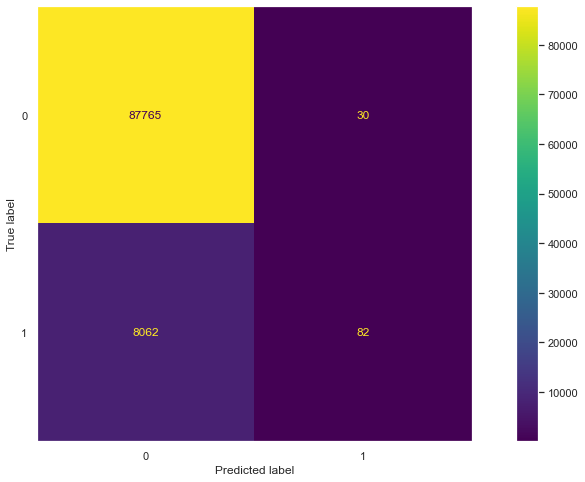

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled_full, y_full, test_size = 0.3)
knn = KNeighborsClassifier(n_neighbors = 410)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
confusion = confusion_matrix(y_test, pred, labels = knn.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=knn.classes_)
display.plot()
plt.grid(False)
plt.show()

In [43]:
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


recall:  1.006876227897839
precision:  73.21428571428571


## BEST KNN With SMOTE

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.849
Test AUC-ROC %.3f %  0.8300490085015931


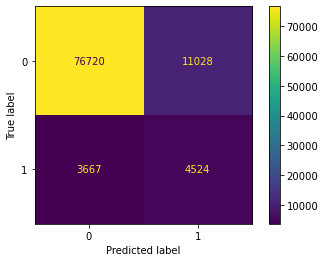

recall:  55.23135148333537
precision:  29.089506172839506
time: 4min 47s (started: 2022-05-07 18:59:22 +05:00)


In [26]:
model = knn = KNeighborsClassifier()
parameters = {
    "model__n_neighbors": [100]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


## BEST GB MODEL WITHOUT SMOTE:

In [66]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.05)
scores = cross_val_score(gb, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 5)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   5 out of  10 | elapsed: 11.1min remaining: 11.1min
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed: 22.4min finished


0.8422
time: 22min 26s (started: 2022-05-06 02:46:44 +05:00)


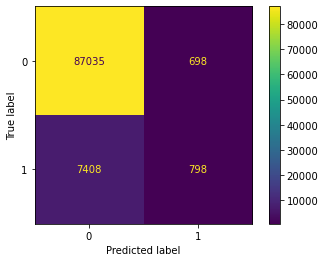

time: 3min 19s (started: 2022-05-06 12:38:29 +05:00)


In [99]:
#CONFUSION MATRIX OF GB ON FULL DATASET WITH BEST PARAMETERS

x_train, x_test, y_train, y_test = train_test_split(x_scaled_full, y_full, test_size = 0.3)
gb = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.05)
gb.fit(x_train, y_train)
pred = gb.predict(x_test)
confusion = confusion_matrix(y_test, pred, labels = gb.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=gb.classes_)
display.plot()
plt.grid(False)
plt.show()

##### ON FULL DATASET WITH LR = 0.05, N_EST = 1000

recall = 9%               
precision = 54%
AUC = 0.8415

## BEST GB MODEL WITH SMOTE

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters:  {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 250}
Test AUC-ROC %.3f %  0.8423525639038913


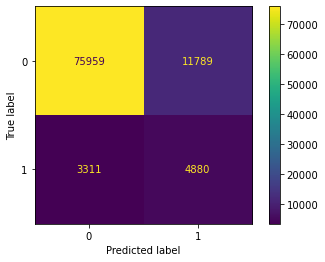

recall:  59.5775851544378
precision:  29.275901373807667
time: 2min 3s (started: 2022-05-07 23:43:56 +05:00)


In [63]:
model = gb = GradientBoostingClassifier(  )
parameters = {
    "model__learning_rate": [0.05],
    "model__n_estimators":[250],
    "model__max_depth": [5]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)

print('Best parameters: ', clf.best_params_)

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


## BEST RF MODEL WITHOUT SMOTE:

In [23]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "min_samples_split": [15],
    "min_samples_leaf": [15],
    "max_depth":[20],
    "max_features":[5],
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -10, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled_full , np.ravel(y_full))
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)  

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, score=0.840 total time= 2.1min
[CV 2/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, score=0.844 total time= 2.2min
[CV 3/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, score=0.842 total time= 2.1min
[CV 4/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, score=0.837 total time= 2.1min
[CV 5/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, score=0.842 total time= 2.0min
[CV 6/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, score=0.842 total time= 2.1min
[CV 7/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, scor

In [ ]:
trainX, testX, trainy, testy = train_test_split(x_scaled_full , y_full, test_size=0.3, random_state=2)
rf = RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=15,
                       min_samples_split=15, n_estimators=1000, n_jobs=-1, verbose = 1)
rf.fit(trainX, trainy)
pred = rf.predict(testX)
RF_conf_matrix = confusion_matrix(testy, pred)

display = ConfusionMatrixDisplay(confusion_matrix = RF_conf_matrix, display_labels = rf.classes_)
display.plot()
plt.grid(False)
plt.show()

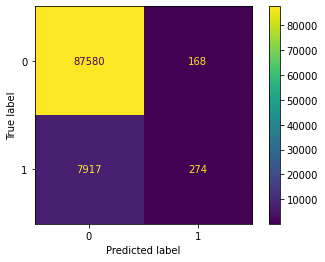

    ROC-AUC = 0.8397
    Recall = 3.3%
    Precision = 61%

## BEST RF MODEL WITH SMOTE

In [66]:
model = RandomForestClassifier()
parameters = {
    "model__max_depth":[20],
    "model__max_features":[5],
    "model__min_samples_leaf": [15],
    "model__min_samples_split": [15],
    "model__n_estimators":[1000]
    }
over = SMOTE(random_state=2)
#under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
#scores = cross_val_score(pipeline, x_train_full, y_train_full, scoring='roc_auc', cv=cv, n_jobs=-10)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print((clf.best_score_))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.815 total time= 6.2min
[CV 2/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.819 total time= 6.2min
[CV 3/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.821 total time= 6.2min
[CV 4/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.815 total time= 6.4min
[CV 5/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.825 total time= 6.6min
[CV 6/10] END model__max_depth=20, model__max_features=5, model__min_sampl

In [67]:
md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
md_auc

0.8328917631892756

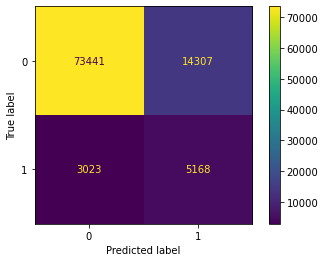

recall:  0.6309363936027347
specificity:  0.836953548798833
Precision:  0.2653658536585366


In [68]:
pred = clf.predict(x_test_full)
cm = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()
plt.grid(False)
plt.show()

TN = cm[0,0] 
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

recall = TP / (TP + FN)
specificity = TN / (TN + FP)
acc = (TP + TN) / (TP + FP + TN + FN)
Precision = TP / (TP + FP)

print("recall: ",recall)
print("specificity: ",specificity)
print("Precision: ",Precision)

## BEST DT MODEL WITH SMOTE

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.773
Test AUC-ROC %.3f %  0.6904057204422648


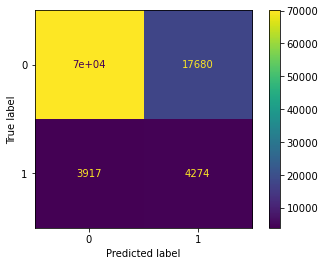

recall:  52.179221096325236
precision:  19.467978500501047
time: 26.8 s (started: 2022-05-07 19:08:46 +05:00)


In [28]:
model =dt = DecisionTreeClassifier()
parameters = {
    "model__min_samples_split": [6]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

## BEST XGB MODEL WITH SMOTE

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.841
Test AUC-ROC %.3f %  0.8413288438656982


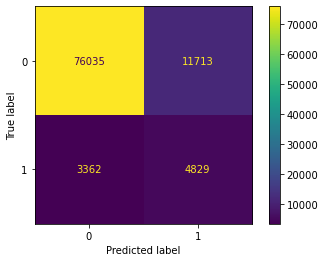

recall:  58.95495055548773
precision:  29.192358844154278
time: 55.1 s (started: 2022-05-18 01:32:10 +05:00)


In [12]:
model = XGB = XGBClassifier( random_state=2, verbosity=1, n_jobs = -1)
parameters = {
    "model__max_depth": [None],
    'model__learning_rate': [0.1],
    'model__n_estimators': [100]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

## BEST STACKING MODEL WITH SMOTE

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    1.8s finished


[CV 1/10] END .................................., score=0.834 total time=12.8min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.7min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.2min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.7min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.7min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    2.0s finished


[CV 2/10] END .................................., score=0.831 total time=12.8min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.7min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.8min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    1.9s finished


[CV 3/10] END .................................., score=0.836 total time=12.6min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.8min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.2min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    1.8s finished


[CV 4/10] END .................................., score=0.832 total time=12.8min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    1.8s finished


[CV 5/10] END .................................., score=0.837 total time=12.2min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    1.8s finished


[CV 6/10] END .................................., score=0.836 total time=12.2min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    1.7s finished


[CV 7/10] END .................................., score=0.836 total time=12.3min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    1.8s finished


[CV 8/10] END .................................., score=0.832 total time=12.3min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    1.7s finished


[CV 9/10] END .................................., score=0.840 total time=12.3min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    1.8s finished


[CV 10/10] END ................................., score=0.835 total time=12.3min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.8min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.3min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.8min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    2.5s finished


Train ROC AUC: 0.835
Test AUC-ROC %.3f %  0.8438860065516413


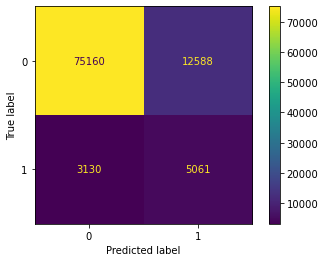

recall:  61.78732755463313
precision:  28.67584565697773


In [102]:
clf1 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
clf2 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.1, n_estimators = 1000,   n_jobs = -1)
clf9 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 13, min_samples_split = 13)
clf10 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 17, min_samples_split = 17)
clf11 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
# clf3 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.05)
# clf4 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
model = vc = StackingClassifier(estimators = [('rf1', clf1), ('rf2', clf2), ('rf9', clf9),('rf10', clf10), ('lr1', clf11)],
                       n_jobs = -10, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

## BEST VOTING CLASSIFIER MODEL WITH SMOTE

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.815
Test AUC-ROC %.3f %  0.8436250248468207


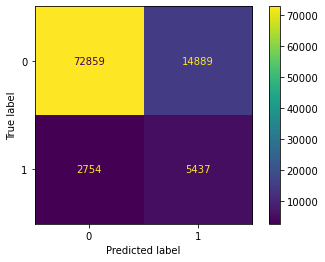

recall:  66.37773165669637
precision:  26.74899143953557
time: 7min 31s (started: 2022-05-08 04:24:52 +05:00)


In [81]:
clf1 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
clf2 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 1000,   n_jobs = -1)
clf3 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
model = vc = VotingClassifier(estimators = [('lr', clf1), ('xgb', clf2), ('rf', clf3)],
                      voting = 'soft', n_jobs = -1, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

In [11]:
x_train_full, x_test_full , y_train_full, y_test_full = train_test_split(x_scaled_full, y_full, test_size = 0.3, random_state = 2)

time: 125 ms (started: 2022-05-18 01:31:51 +05:00)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.815
Test AUC-ROC %.3f %  0.8434907558752209


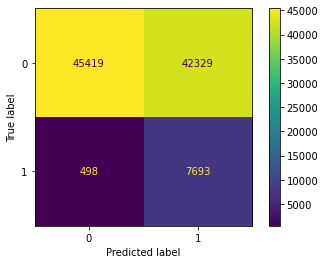

recall:  93.92015626907582
precision:  15.379233137419535


In [9]:
clf1 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
clf2 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 1000,   n_jobs = -1)
clf3 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
model = vc = VotingClassifier(estimators = [('lr', clf1), ('xgb', clf2), ('rf', clf3)],
                      voting = 'soft', n_jobs = -1, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = (clf.predict_proba(x_test_full)[:,1] >= 0.2).astype(bool)
# pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.816
Test AUC-ROC %.3f %  0.8438529210519817


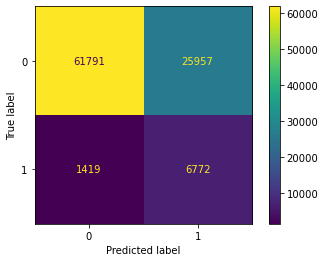

recall:  82.67610792333049
precision:  20.691130190351064


In [10]:
clf1 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
clf2 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 1000,   n_jobs = -1)
clf3 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
model = vc = VotingClassifier(estimators = [('lr', clf1), ('xgb', clf2), ('rf', clf3)],
                      voting = 'soft', n_jobs = -1, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = (clf.predict_proba(x_test_full)[:,1] >= 0.35).astype(bool)
# pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.909
Test AUC-ROC %.3f %  0.8442548931770505


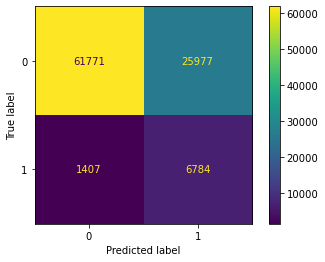

recall:  82.82261018190698
precision:  20.707548609627302


In [13]:
clf1 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
clf2 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 1000,   n_jobs = -1)
clf3 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
model = vc = VotingClassifier(estimators = [('lr', clf1), ('xgb', clf2), ('rf', clf3)],
                      voting = 'soft', n_jobs = -1, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
# steps = [('over', over), ('under', under), ('model', model)]
steps = [('model', model)]

pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = (clf.predict_proba(x_test_full)[:,1] >= 0.20).astype(bool)
# pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

## TOP THREE WINNER MODELS

## WINNER 1 LOGISTIC REGRESSION MODEL WITH SMOTE

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.748
Test AUC-ROC %.3f %  0.8418854301794196


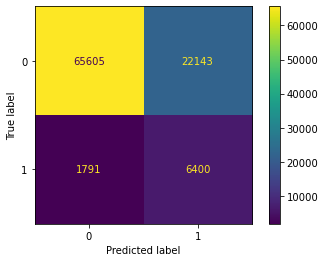

recall:  78.13453790745942
precision:  22.422310198647654
time: 34.3 s (started: 2022-05-07 21:37:51 +05:00)


In [46]:
model = lr = LogisticRegression(  class_weight= 'balanced')
parameters = {
    "model__max_iter": [500],

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

## WINNER 2 VOTING CLASSIFIER MODEL WITH SMOTE

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.815
Test AUC-ROC %.3f %  0.8436250248468207


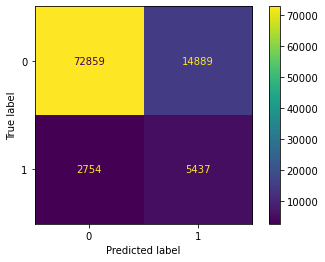

recall:  66.37773165669637
precision:  26.74899143953557
time: 7min 31s (started: 2022-05-08 04:24:52 +05:00)


In [81]:
clf1 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
clf2 = X`GBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 1000,   n_jobs = -1)
clf3 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
model = vc = VotingClassifier(estimators = [('lr', clf1), ('xgb', clf2), ('rf', clf3)],
                      voting = 'soft', n_jobs = -1, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

## WINNER 3 VOTING CLASSIFIER MODEL WITH SMOTE

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.800
Test AUC-ROC %.3f %  0.8424440923369381


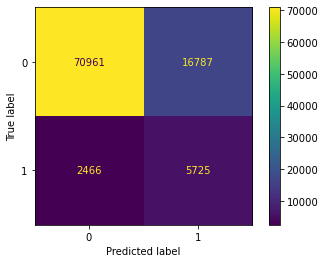

recall:  69.89378586253204
precision:  25.43088130774698
time: 5min 31s (started: 2022-05-08 01:22:53 +05:00)


In [70]:
clf1 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
clf2 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 1000,   n_jobs = -1)
model = vc = VotingClassifier(estimators = [('lr', clf1), ('xgb', clf2)],
                      voting = 'soft', n_jobs = -1, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)